# HLAthena
### A Python package for HLA class I peptide analysis, binding prediction, and model training

## Installation

To install hlathena run: 

    git clone https://github.com/ssarkizova/hlathenav2
    cd hlathenav2
    pip install .

## Usage

#### Importing the package

In [1]:
import hlathena as ht 

Next, we'll import some example data

In [2]:
import pandas as pd
sample_pep_file = "A0101_filtered.txt"
df = pd.read_table(sample_pep_file)
peptides = list(df['seq'])

### Peptide analysis

First, we'll plot the length distribution of the peptide set.

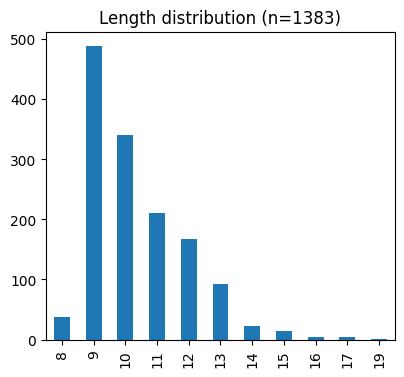

In [3]:
ht.plot_length(peptides)

Next, we'll visualize the amino acid motifs of this peptide set

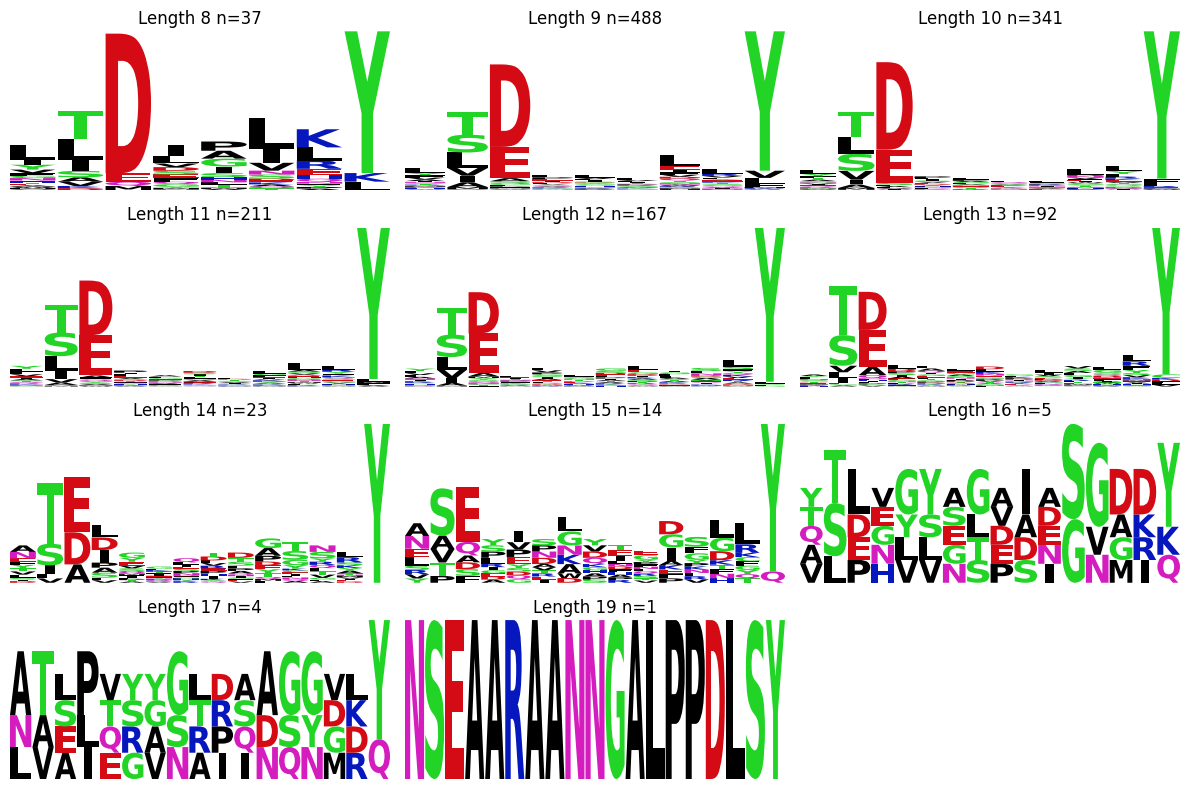

In [4]:
ht.plot_logo(peptides)

Let's examine the 9mer's motif more closely

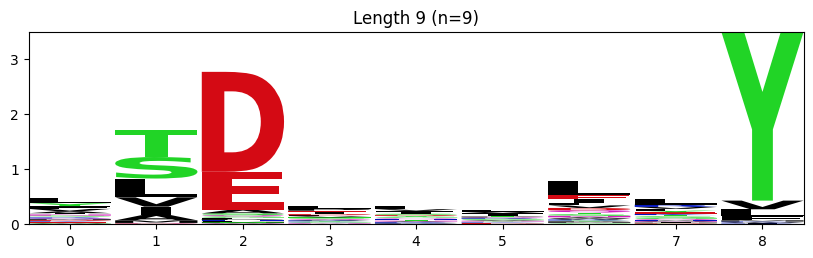

In [5]:
ht.plot_logo(peptides, 9)

Next, we want to cluster these peptides with a UMAP. First, we'll neeed to do some dimensionality reduction using the peptide projection module.

We will specify that we want to use Kidera Factors for the amino acid encoding by providing a file path. Additional files with amino acid encodings can be included (they must be tab-delimited txt files with one row per amino acid symbol and 1+ columns). 

We will also save this encoding in case we want to re-use it later.

In [6]:
feature_matrix = ht.PCA_encode(peptides, 'A0101', 9, aa_featurefiles=['kideraFactors.txt'], save_PCA_path='pca_encoding.npz')

Now we can make a simple UMAP plot:

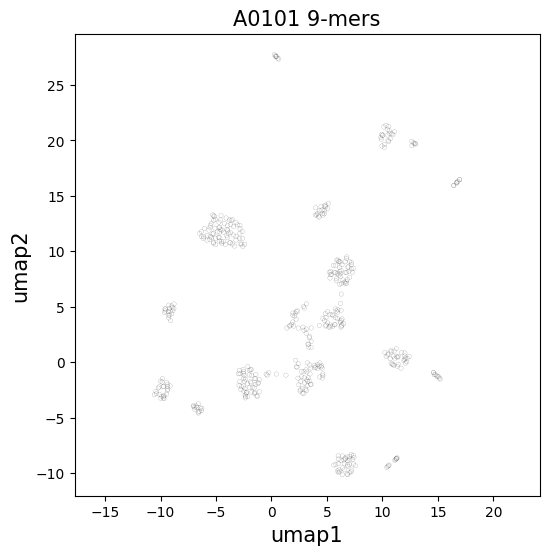

In [7]:
ht.plot_umap(feature_matrix, title='A0101 9-mers')

### Annotate peptide set

In [8]:
pep_df = pd.DataFrame(peptides, columns=['seq'])
annotated_peptides = ht.get_reference_gene_ids(pep_df, add_context=True)
annotated_peptides.head()

,seq,Hugo_Symbol,ctex_up,ctex_dn
0,YSDVAKGILQY,SPATA20,HVPHFEKMLYDQAQLAVAYSQAFQLSGDEF,VARSLSHRSGGFYSAEDADSPPERGQRPK-
1,HIDFGGTSVWY,KDM7A,ENYWPDDSVFPKPFVQKYCLMGVQDSYTDF,HVLWGEKIFYLIKPTDENLARYESWSSSV-
2,YLETVAAYY,IL32,PKVLSDDMKKLKARMVMSSLAELEDDFKEG,EEQHPELTPLLEKERDGLRCRGNRSPVPD-
3,LSELFMSSFQSY,IL32,GVLAWVKEKVVALVHAVQALWKQFQSFCCS,GAPRGDKEELTPQKCSEPQSSK--------
4,HSEFLTVPAGSY,HIVEP2,LSHSSSFSMSFEREETSKLSALPKQDEFGK,SLSVPGHHHQKEMRRCSSEQMPCPHPAEV-


Next, we will annotate with TCGA reference data. In order to determine which options are available and/or the TCGA cancer type abbreviation, we call the ```list_expression_references()``` function. In this case, we will annotate with reference breast cancer expression data. 

In [9]:
ht.list_expression_references().head()

,Study Name
Study Abbreviation,
LAML,Acute Myeloid Leukemia
ACC,Adrenocortical carcinoma
BLCA,Bladder Urothelial Carcinoma
LGG,Brain Lower Grade Glioma
BRCA,Breast invasive carcinoma


 We find the relevant TCGA abbreviation and call ```add_tcga_expression```.

In [10]:
ht.add_tcga_expression(annotated_peptides, 'BRCA')

,seq,Hugo_Symbol,ctex_up,ctex_dn,BRCA_TPM
0,YSDVAKGILQY,SPATA20,HVPHFEKMLYDQAQLAVAYSQAFQLSGDEF,VARSLSHRSGGFYSAEDADSPPERGQRPK-,60.573
1,YSDVAKGILQY,SPATA20,----------XQAQLAVAYSQAFQLSGDEF,VARSLSHRSGGFYSAEDADSPPERGQRPK-,60.573
2,HIDFGGTSVWY,KDM7A,ENYWPDDSVFPKPFVQKYCLMGVQDSYTDF,HVLWGEKIFYLIKPTDENLARYESWSSSV-,10.569
3,YLETVAAYY,IL32,PKVLSDDMKKLKARMVMSSLAELEDDFKEG,EEQHPELTPLLEKERDGLRCRGNRSPVPD-,90.279
4,LSELFMSSFQSY,IL32,GVLAWVKEKVVALVHAVQALWKQFQSFCCS,GAPRGDKEELTPQKCSEPQSSK--------,90.279
...,...,...,...,...,...
1986,ETEPVFWYY,SNX29,AVLQHGLKRSRGLALTAAAIKQAAGFASKT,VKEVLNKHELQRFYSLRHIASDVGRGRAW-,17.789
1987,RTDPIPIVV,GPATCH8,DRDFQDNIGHRLLQKHGWKLGQGLGKSLQG,KYDVMGMGRMEMELDYAEDATERRRVLEV-,24.838
1988,RTDPIPIVV,GPATCH8,KPIESDNIGHRLLQKHGWKLGQGLGKSLQG,KYDVMGMGRMEMELDYAEDATERRRVLEV-,24.838
1989,MTEKFLFLY,ERVV-2,------------------------------,LSLLPMPLLSQAQWNENSLVSFSKIIASG-,1.000


### Peptide binding prediction

In [11]:
model_path = '../models/NN-time2022-12-16_10-fold0.pt'

ninemers = [pep for pep in peptides if len(pep)==9] # create list of ninemers 
ht.predict(model_path, ninemers)

,seq,score
0,AADIFYSRY,3.5351861242816085e-06
1,AADLNLVLY,9.253963980881963e-06
2,AADLVEALY,9.627723329685978e-07
3,AIDEDVLRY,1.6805062841740437e-05
4,AIDLLKEIY,1.4991079524406814e-06
...,...,...
483,YTSDYFISY,0.0007096683839336038
484,YVDDVFLRV,0.953221321105957
485,YVDPQFLTY,9.512112592346966e-05
486,YVEKFALNY,1.3267753274703864e-05
